In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from collections import defaultdict
from sklearn.decomposition import PCA

# Data Preparation

In [2]:
y_name = 'Occupancy'
df = pd.read_csv(r'../data/training.csv')

test = pd.read_csv(r'../data/test.csv')


In [3]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['Time']= df['date'].apply(lambda x:x.time())
df['Date']= df['date'].apply(lambda x:x.date())
df['Time'] =  pd.to_timedelta(str(x) for x in df['Time'])
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop('date', axis=1, inplace=True)

df.drop('HumidityRatio',inplace=True,axis=1)
df=df[df['Light']<1000]


In [4]:
test['date'] =  pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
test['Time']= test['date'].apply(lambda x:x.time())
test['Date']= test['date'].apply(lambda x:x.date())
test['Time'] =  pd.to_timedelta(str(x) for x in test['Time'])
test['Date'] =  pd.to_datetime(test['Date'], format='%Y-%m-%d')
test.drop('date', axis=1, inplace=True)

test.drop('HumidityRatio',inplace=True,axis=1)


In [5]:
df['Holidays'] = df['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )
test['Holidays'] = test['Date'].apply(lambda x: 0 if x.weekday()<5 else 1 )

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
df

,Unnamed: 0,Temperature,Humidity,Light,CO2,Occupancy,Time,Date,Holidays
0,794,20.70,24.8400,0.00,587.50,0,04:01:00,2015-02-12,0
1,4742,19.79,35.2000,0.00,524.50,0,21:49:00,2015-02-14,1
2,2120,20.89,25.2000,0.00,557.20,0,23:19:00,2015-02-03,0
3,1426,22.20,24.3340,429.50,913.00,1,17:36:00,2015-02-05,0
4,1397,22.08,28.3700,544.20,1198.60,1,11:16:00,2015-02-03,0
...,...,...,...,...,...,...,...,...,...
14386,584,20.60,26.8900,0.00,508.00,0,00:30:59,2015-02-12,0
14387,1278,21.20,25.3925,454.75,782.00,1,09:16:59,2015-02-03,0
14388,6421,19.29,26.8900,0.00,465.50,0,04:51:00,2015-02-09,0
14389,2885,21.70,20.8900,433.00,802.25,1,17:55:00,2015-02-06,0


In [8]:
attributes = ['Temperature','Humidity','Light','CO2','Holidays']
 
X_train =df[attributes].values
y_train=df['Occupancy'].values
X_test=test[attributes].values
y_test=test['Occupancy'].values

In [9]:
#Si selezione il componente principale per la rappresentazione grafica
selected_columns=['Temperature','Humidity','Light','CO2','Holidays']
X = df[selected_columns]
pca= PCA(n_components=1).fit(X)
X=pca.transform(X)
Xt = pca.transform(test[selected_columns])


{'whiskers': [<matplotlib.lines.Line2D at 0x1dc594a8fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc5948ac88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc594a86c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc5948ae48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc59490f08>],
 'means': []}

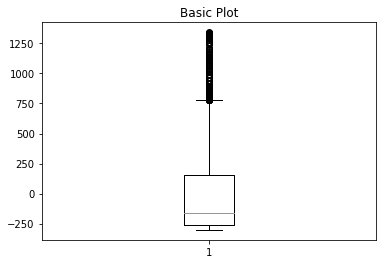

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(Xt)

In [11]:
trl = df[['Light']].values  #uso doppia parentesi qudra per mantenere la forma desiderata 
tel =test[['Light']].values

In [12]:
X_train.shape

(14384, 5)

# Linear Regression

**Dunque ho diverse train e test set** :<ul>
    <li> X_train, Xtest per fare predizione coi 4 attributi ['Temperature','Humidity','Light','CO2']
    <lI> X , Xt che hanno solo il main Component ottenuto da pca, hanno quindi una sola dimensione
        <li> trl, tel   dove la l sta per light, contengono solo l' attributo light

Per ogni regressore lineare ci sono tre regressioni:<ul>
    <li>la prima classificazione è presentata su tutti gli attributi numerici
    <li>La seconda sul primo componente principale ottenuto dalla pca (con annesso il grafico)
    <li>La terza su 'Light'  con annesso grafico


In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

In [14]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-9.14164748e-02  3.70633441e-03  2.01857029e-03  1.19513120e-04
 -1.35461164e-01]
Intercept: 
 1.7315023674716439


In [16]:
y_pred = reg.predict(X_test)

In [17]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.885
MSE: 0.020
MAE: 0.087


In [21]:
X.shape

(14384, 1)

In [22]:
reg = LinearRegression()
reg.fit(X.T.reshape(-1, 1), y_train)
y_pred = reg.predict(Xt.T.reshape(-1, 1))
regX=reg
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.442
MSE: 0.099
MAE: 0.205


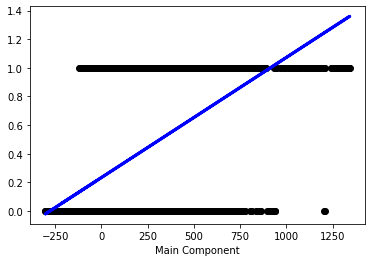

In [23]:
fig1, ax1 = plt.subplots()
ax1.scatter(Xt, y_test,  color='black')
ax1.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel("Main Component")
plt.show()

In [24]:
reg = LinearRegression()
reg.fit(trl.T.reshape(-1, 1), y_train)
y_pred = reg.predict(tel.T.reshape(-1, 1))
regT=reg
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.840
MSE: 0.028
MAE: 0.084


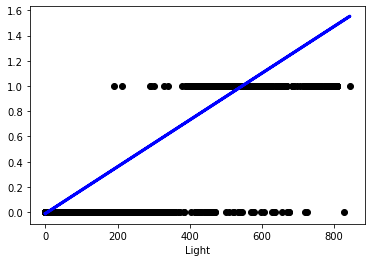

In [25]:
fig,ax1=plt.subplots()
ax1.scatter(tel, y_test,  color='black')
ax1.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
ax1.set_xlabel("Light")
plt.show()

##  LassoLarsCV    

Al posto del lasso.. fa la cross vaidation e utilizza algoritmo Lars che non si sa che cazzo sia ne lo si vuole scorprire

In [26]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [-9.14164748e-02  3.70633441e-03  2.01857029e-03  1.19513120e-04
 -1.35461164e-01]
Intercept: 
 1.731502367471165
R2: 0.885
MSE: 0.020
MAE: 0.087


In [27]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV()
reg.fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [0.00083994]
Intercept: 
 0.2327586206896552
R2: 0.442
MSE: 0.099
MAE: 0.205


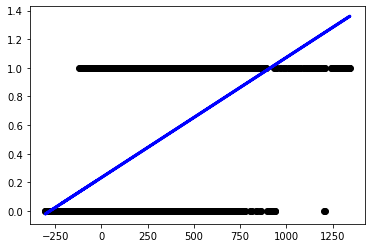

In [28]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

In [29]:
from sklearn.linear_model import LassoLarsCV
reg = LassoLarsCV()
reg.fit(trl, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(tel)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [0.00185282]
Intercept: 
 -0.010419541392998083
R2: 0.840
MSE: 0.028
MAE: 0.084


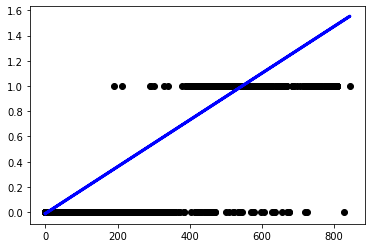

In [30]:
plt.scatter(tel, y_test,  color='black')
plt.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

## Ridge

In [31]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [-9.13960901e-02  3.70506938e-03  2.01851951e-03  1.19541468e-04
 -1.35390510e-01]
Intercept: 
 1.7310784778191441
R2: 0.885
MSE: 0.020
MAE: 0.087


In [32]:
reg = Ridge()
reg.fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [0.00083994]
Intercept: 
 0.2327586206896552
R2: 0.442
MSE: 0.099
MAE: 0.205


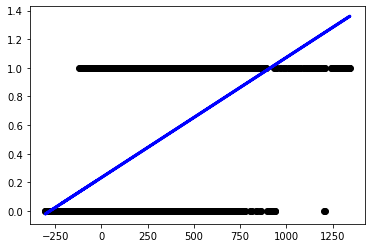

In [33]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

In [34]:
reg = Ridge()
reg.fit(trl, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(tel)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [0.00185282]
Intercept: 
 -0.010419541009597744
R2: 0.840
MSE: 0.028
MAE: 0.084


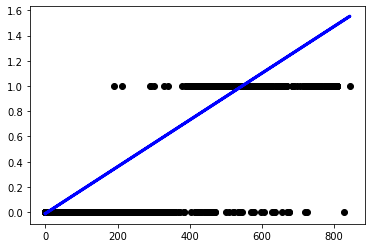

In [35]:
plt.scatter(tel, y_test,  color='black')
plt.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()


## HUBER


In [36]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

In [37]:
huber = HuberRegressor().fit(X_train, y_train)
huber.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = huber.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Coefficients: 
 [0.00185282]
Intercept: 
 -0.010419541009597744
R2: 0.802
MSE: 0.035
MAE: 0.069


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
huber = HuberRegressor().fit(X, y_train)
huber.fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = huber.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [0.00185282]
Intercept: 
 -0.010419541009597744
R2: 0.434
MSE: 0.100
MAE: 0.204


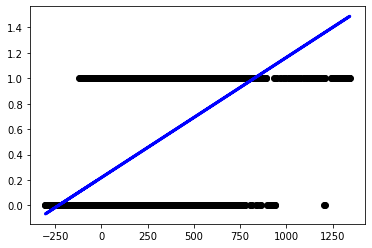

In [39]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

In [40]:
huber = HuberRegressor().fit(trl, y_train)
huber.fit(trl, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = huber.predict(tel)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [0.00185282]
Intercept: 
 -0.010419541009597744
R2: 0.801
MSE: 0.035
MAE: 0.069


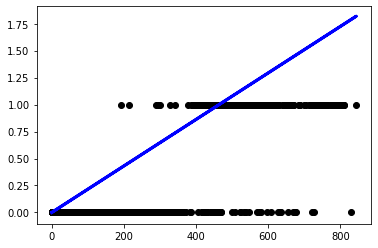

In [41]:
plt.scatter(tel, y_test,  color='black')
plt.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

## Theil


Very bad results

In [42]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression

reg = TheilSenRegressor(random_state=0).fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [1.0667387e-05]
Intercept: 
 0.000877297079811755


In [43]:
y_pred = reg.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.286
MSE: 0.228
MAE: 0.231


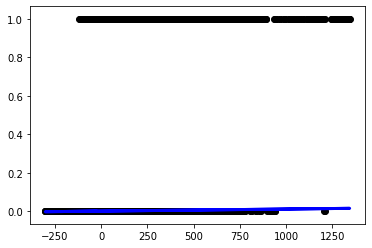

In [44]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     
plt.show()

#fa proprio cagare

## Bayesian Ridge

In [45]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge().fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [-9.13419045e-02  3.70171040e-03  2.01838452e-03  1.19616745e-04
 -1.35202820e-01]
Intercept: 
 1.7299517009391572
R2: 0.885
MSE: 0.020
MAE: 0.087


In [46]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge().fit(X, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(Xt)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [0.00083992]
Intercept: 
 0.2327586206896552
R2: 0.442
MSE: 0.099
MAE: 0.205


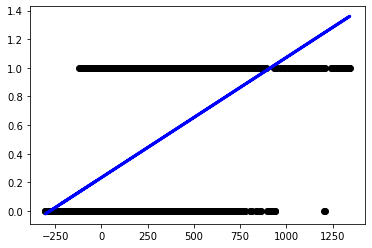

In [47]:
plt.scatter(Xt, y_test,  color='black')
plt.plot(Xt, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

In [48]:
reg = BayesianRidge().fit(trl, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
y_pred = reg.predict(tel)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

Coefficients: 
 [0.00185281]
Intercept: 
 -0.010417621771622532
R2: 0.840
MSE: 0.028
MAE: 0.084


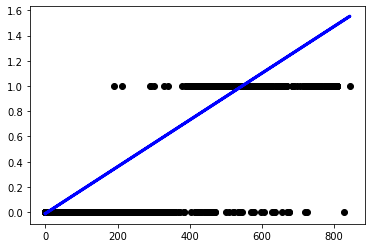

In [49]:
plt.scatter(tel, y_test,  color='black')
plt.plot(tel, y_pred, color='blue', linewidth=3)     #Dataframe.T fa il trasposto del df
plt.show()

# Robust Linear Model


#Non funzione purtroppo il Ransac


import statsmodels.api as sm

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn import linear_model, datasets
from sklearn.linear_model import RANSACRegressor

In [50]:
X_train.shape


(14384, 5)


reg = linear_model.RANSACRegressor().fit(X_train, y_train)

# Classification

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [52]:
#which is the best feature??
#Si selezione il componente principale per la rappresentazione grafica
selected_columns=['Temperature','Humidity','Light','CO2','Holidays']
X = df[selected_columns]
X = PCA(n_components=1).fit_transform(X)
Xt = PCA(n_components=1).fit_transform(test[selected_columns])


In [53]:
#Tuttavia eseguiamo la classificazione con i nostri soliti 4 attributi

attributes = ['Temperature','Humidity','Light','CO2']
 
X_train =df[attributes].values
y_train=df['Occupancy'].values
X_test=test[attributes].values
y_test=test['Occupancy'].values

In [54]:
trl = df[['Light']].values  #uso doppia parentesi qudra per mantenere la forma desiderata 
tel =test[['Light']].values

In [55]:
print(len(X_train),len(y_train))
print(X_train.shape)

14384 14384
(14384, 4)


In [56]:
print(trl.shape,tel.shape)  
#senza le quadre prima, sarebbe venuta shape = (14348,19)

(14384, 1) (6168, 1)


**Dunque ho diverse train e test set** :<ul>
    <li> X_train, Xtest per fare predizione coi 4 attributi ['Temperature','Humidity','Light','CO2']<\lI>
    <lI> X , Xt che hanno solo il main Component ottenuto da pca, hanno quindi una sola dimensione<\li>
        <li> trl, tel   dove la l sta per light, contengono solo l' attributo light

C:\Users\carlo\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


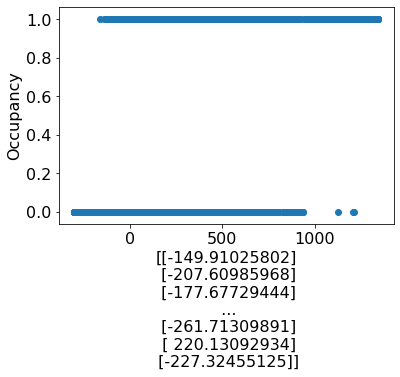

In [57]:
plt.scatter(X, y_train)
plt.xlabel(X, fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegressionCV

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='saga')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score=clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9828145265888456
F1-score [0.9887186  0.96394558]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.93      1.00      0.96      1421

    accuracy                           0.98      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.98      0.98      0.98      6168



C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [60]:
clf = LogisticRegression(random_state=0, solver='newton-cg')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score=clf.predict_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9897859922178989
F1-score [0.99332839 0.9782233 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.96      1.00      0.98      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



Passo il classificatore su X ( il componente principale per poter fare il grafo)

In [61]:
from scipy.special import expit

clf = LogisticRegression(random_state=0, class_weight='balanced',solver='newton-cg')
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8850518806744487
F1-score [0.92314363 0.772099  ]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4747
           1       0.71      0.85      0.77      1421

    accuracy                           0.89      6168
   macro avg       0.83      0.87      0.85      6168
weighted avg       0.90      0.89      0.89      6168



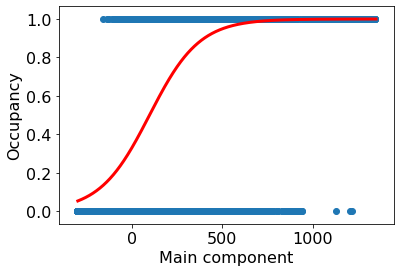

In [62]:
loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='red', linewidth=3)
plt.scatter(X, y_train)
plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [63]:
reg = LinearRegression()
reg.fit(X, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

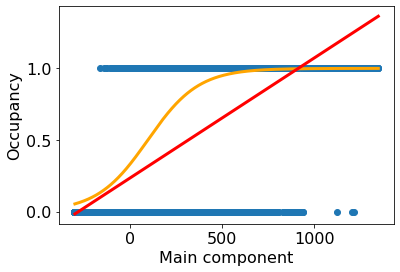

In [64]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_log=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [65]:
from scipy.special import expit

clf = LogisticRegression(random_state=0, class_weight='balanced',solver='newton-cg')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9824902723735408
F1-score [0.98850575 0.96326531]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.93      1.00      0.96      1421

    accuracy                           0.98      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.98      0.98      0.98      6168



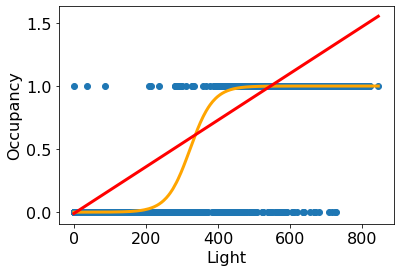

In [66]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_log=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## PERCEPTRON

In [67]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9777885862516212
F1-score [0.98536481 0.95394958]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4747
           1       0.91      1.00      0.95      1421

    accuracy                           0.98      6168
   macro avg       0.96      0.99      0.97      6168
weighted avg       0.98      0.98      0.98      6168



In [70]:
from scipy.special import expit

clf = Perceptron(random_state=0)
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.18369001297016863
F1-score [0.30656934 0.00788177]
              precision    recall  f1-score   support

           0       0.44      0.23      0.31      4747
           1       0.01      0.01      0.01      1421

    accuracy                           0.18      6168
   macro avg       0.22      0.12      0.16      6168
weighted avg       0.34      0.18      0.24      6168



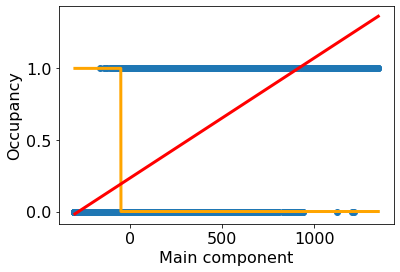

In [71]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_perceptron=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [72]:
from scipy.special import expit

clf = Perceptron(random_state=0)
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.916018158236057
F1-score [0.94229055 0.84583333]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4747
           1       0.73      1.00      0.85      1421

    accuracy                           0.92      6168
   macro avg       0.87      0.95      0.89      6168
weighted avg       0.94      0.92      0.92      6168



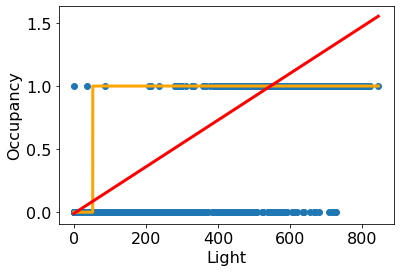

In [73]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_perceptron=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## RidgeClassifierCV

In [74]:
from sklearn.linear_model import RidgeClassifierCV
clf =RidgeClassifierCV(normalize=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9865434500648509
F1-score [0.99118802 0.97154611]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.95      1.00      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [75]:
from scipy.special import expit

clf = RidgeClassifierCV(class_weight='balanced')
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8868352788586251
F1-score [0.92521963 0.76748834]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4747
           1       0.73      0.81      0.77      1421

    accuracy                           0.89      6168
   macro avg       0.84      0.86      0.85      6168
weighted avg       0.89      0.89      0.89      6168



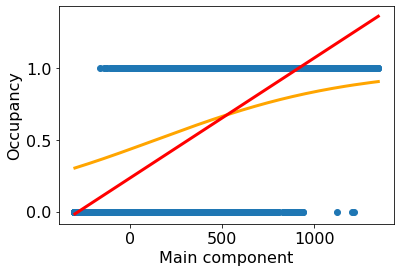

In [76]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_ridge=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [77]:
from scipy.special import expit

clf = RidgeClassifierCV(class_weight='balanced')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9682230869001297
F1-score [0.97892926 0.93539881]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4747
           1       0.88      1.00      0.94      1421

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.96      6168
weighted avg       0.97      0.97      0.97      6168



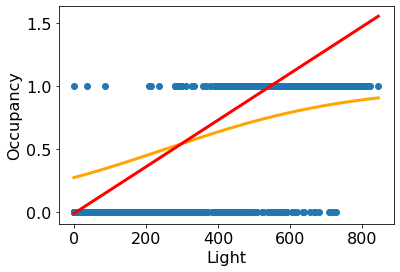

In [78]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_ridge=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## PassiveAggressiveClassifier

In [79]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf =PassiveAggressiveClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9854085603112841
F1-score [0.99043571 0.96924129]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4747
           1       0.94      1.00      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [80]:
from scipy.special import expit

clf = PassiveAggressiveClassifier(class_weight='balanced') # gives worst results
clf.fit(X, y_train)
y_pred = clf.predict(Xt)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.878242542153048
F1-score [0.91634176 0.77642155]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4747
           1       0.67      0.92      0.78      1421

    accuracy                           0.88      6168
   macro avg       0.82      0.89      0.85      6168
weighted avg       0.90      0.88      0.88      6168



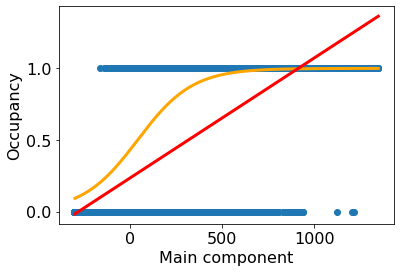

In [81]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_pa=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [82]:
from scipy.special import expit

clf = PassiveAggressiveClassifier(class_weight='balanced')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9727626459143969
F1-score [0.98199357 0.94411178]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4747
           1       0.90      1.00      0.94      1421

    accuracy                           0.97      6168
   macro avg       0.95      0.98      0.96      6168
weighted avg       0.98      0.97      0.97      6168



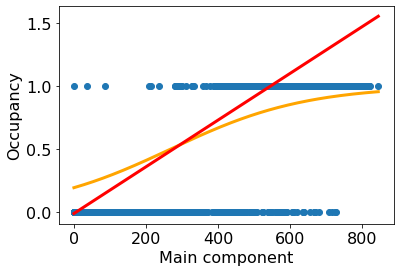

In [83]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_pa=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## SGDClassifier

In [84]:
from sklearn.linear_model import SGDClassifier
clf =SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9880025940337225
F1-score [0.99214937 0.97457045]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4747
           1       0.95      1.00      0.97      1421

    accuracy                           0.99      6168
   macro avg       0.98      0.99      0.98      6168
weighted avg       0.99      0.99      0.99      6168



In [85]:
from scipy.special import expit

clf = SGDClassifier()
clf.fit(X, y_train)
y_pred = clf.predict(Xt)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.788586251621271
F1-score [0.87653853 0.26493799]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4747
           1       0.67      0.17      0.26      1421

    accuracy                           0.79      6168
   macro avg       0.73      0.57      0.57      6168
weighted avg       0.77      0.79      0.74      6168



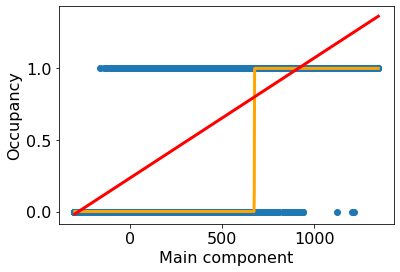

In [86]:
plt.scatter(X, y_train)

loss = expit(sorted(Xt) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(Xt), loss, color='orange', linewidth=3)
loss_pca_sgdc=loss

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [87]:
from scipy.special import expit

clf = SGDClassifier(class_weight='balanced')
clf.fit(trl, y_train)
y_pred = clf.predict(tel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9656290531776913
F1-score [0.97716993 0.9304918 ]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4747
           1       0.87      1.00      0.93      1421

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.95      6168
weighted avg       0.97      0.97      0.97      6168



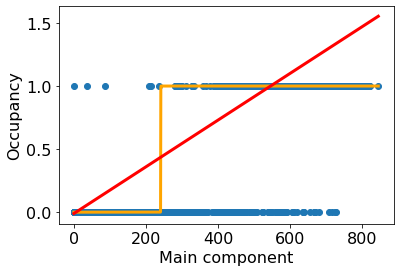

In [88]:
plt.scatter(trl, y_train)

loss = expit(sorted(tel) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(tel), loss, color='orange', linewidth=3)
loss_l_sgdc=loss

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)


plt.xlabel('Main component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# EVALUATION

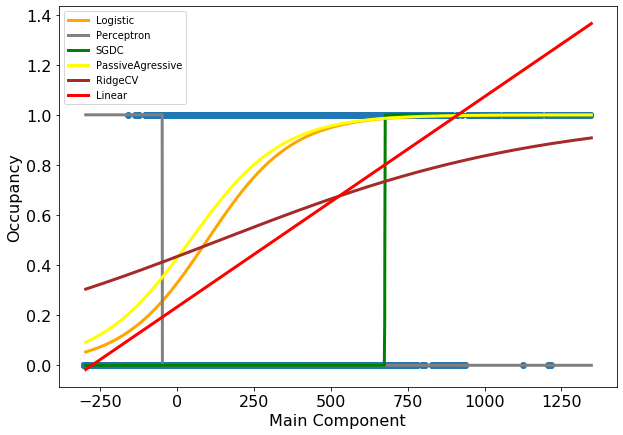

In [89]:
plt.figure(figsize=(10,7))

plt.scatter(X, y_train)


plt.plot(sorted(Xt), loss_pca_log, color='orange', linewidth=3)
plt.plot(sorted(Xt), loss_pca_perceptron, color='grey', linewidth=3)
plt.plot(sorted(Xt), loss_pca_sgdc, color='green', linewidth=3)
plt.plot(sorted(Xt), loss_pca_pa, color='yellow', linewidth=3)
plt.plot(sorted(Xt), loss_pca_ridge, color='brown', linewidth=3)

plt.plot(sorted(Xt), regX.coef_ * sorted(Xt) + regX.intercept_, color='red', linewidth=3)

plt.legend(('Logistic','Perceptron','SGDC','PassiveAgressive','RidgeCV','Linear'),loc='best')
plt.xlabel('Main Component', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

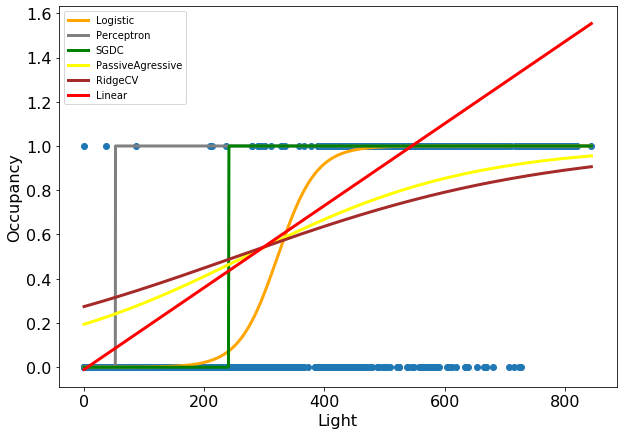

In [90]:
plt.figure(figsize=(10,7))
plt.scatter(trl, y_train)


plt.plot(sorted(tel), loss_l_log, color='orange', linewidth=3)
plt.plot(sorted(tel), loss_l_perceptron, color='grey', linewidth=3)
plt.plot(sorted(tel), loss_l_sgdc, color='green', linewidth=3)
plt.plot(sorted(tel), loss_l_pa, color='yellow', linewidth=3)
plt.plot(sorted(tel), loss_l_ridge, color='brown', linewidth=3)

plt.plot(sorted(tel), regT.coef_ * sorted(tel) + regT.intercept_, color='red', linewidth=3)

plt.legend(('Logistic','Perceptron','SGDC','PassiveAgressive','RidgeCV','Linear'),loc='best')
plt.xlabel('Light', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [91]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve



Otteniamo i 4 grafici roc curve lift etc.. su  logistic regresion

y_score è infatti stata salvata prima quando classifichevamo con il log lanciando
"y_score=clf.predict_proba(X_test)"

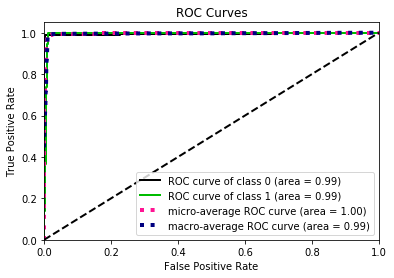

In [168]:
plot_roc(y_test, y_score)
plt.show()

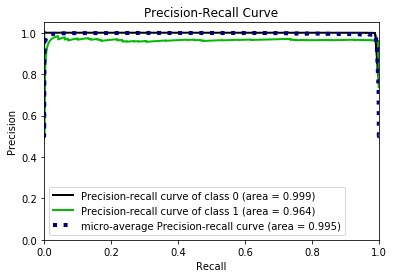

In [169]:
plot_precision_recall(y_test, y_score)
plt.show()

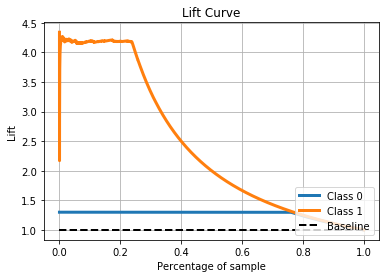

In [170]:
plot_lift_curve(y_test, y_score)
plt.show()

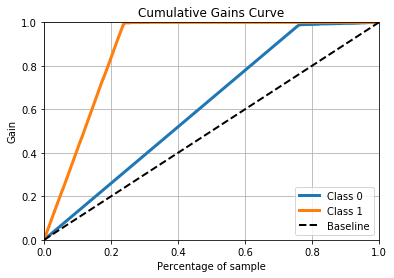

In [171]:
plot_cumulative_gain(y_test, y_score)
plt.show()